# 🔒 Regularization & Ridge Regression in Machine Learning

Regularization is a critical technique used to prevent **overfitting**, especially in **linear** and **logistic regression** models.

---

## 📌 What is Regularization?

Regularization introduces a **penalty term** to the loss function that discourages overly complex models.

### 🔍 Why?
To ensure the model **generalizes well** to unseen data, not just fits the training set perfectly.

---

## 🛠️ Types of Regularization

| Type         | Penalty Term       | Effect                                   |
|--------------|--------------------|------------------------------------------|
| **Ridge**    | L2 (`λ * Σw²`)      | Shrinks coefficients, never zero         |
| **Lasso**    | L1 (`λ * Σ|w|`)     | Shrinks some coefficients to **zero**    |
| **ElasticNet** | L1 + L2 combo    | Mix of both Ridge and Lasso              |

> This summary focuses on **Ridge Regression**.

---

## ⚠️ Overfitting Refresher

- Overfitting happens when a model learns noise in the training data.
- In **Linear Regression**, this leads to **very large coefficients** (slopes).
- A regularized model adds constraints to **avoid extreme weight values**.

---

## 📉 How Ridge Regression Works

Ridge Regression modifies the cost function of Linear Regression:

### 🧮 Cost Function:
$$
J(\mathbf{w}) = \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_i^2
$$

- First term: **Mean Squared Error**
- Second term: **L2 penalty**
- `λ` (lambda/alpha): **Regularization strength**

> Larger λ → More penalty → Smaller weights → Simpler model

---

## 🔢 Mathematical Formulation

### ✅ 1D Case:
Adds penalty `λ * m²` to discourage large slope `m`.

### ✅ N-Dimensional Case:
$$
\mathbf{w} = (X^TX + \lambda I)^{-1} X^T y
$$

- `X`: Input matrix  
- `y`: Target vector  
- `I`: Identity matrix (excluding intercept for regularization)

---

## 🔁 Ridge Regression with Gradient Descent

### 💡 Loss Function:
$$
J(\mathbf{w}) = \frac{1}{n} \|Xw - y\|^2 + \lambda \|w\|^2
$$

### 🔁 Gradient Descent Update:
$$
w = w - \eta \cdot \left[\frac{2}{n}X^T(Xw - y) + 2\lambda w\right]
$$

- `η`: learning rate  
- Regularization is applied to the gradient step

---

## ⚖️ Alpha (λ) Effect

| Alpha (λ) Value | Effect                           | Outcome            |
|------------------|-----------------------------------|---------------------|
| 0                | No regularization                | Overfitting         |
| Small            | Light penalty                    | Good generalization |
| Large            | Heavy penalty (underfit risk)    | Underfitting        |

> 🎯 Choose optimal `α` using **cross-validation**.

---

## 📊 Bias-Variance Trade-off with Ridge

- **Small λ** → Low bias, high variance (risk of overfitting)
- **Large λ** → High bias, low variance (risk of underfitting)
- **Ideal λ** → Balanced model with low total error

---

## 🧠 Why Called "Ridge"?

In coefficient space (2D case), the constraint imposed by L2 norm forms a **circular boundary**.
- The solution lies on the **ridge** (boundary) formed by this constraint intersecting with the loss contour.

---

## 💡 When to Use Ridge Regression?

- When you have **multiple features**
- When model is **overfitting**
- When you want **smaller but non-zero coefficients**

---

## ✅ Summary

| Concept              | Ridge Regression Explanation                               |
|----------------------|------------------------------------------------------------|
| Regularization Goal  | Prevent overfitting by penalizing large coefficients       |
| Loss Function        | MSE + λ × sum of squares of weights                        |
| Lambda (`λ`/`alpha`) | Controls penalty strength                                  |
| Model Behavior       | Shrinks coefficients, improves generalization              |
| Best Use Case        | Linear models with many correlated features                |



In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [119]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [120]:
X=data.data
y=data.target

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [122]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [123]:
L.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [124]:
y_pred = L.predict(X_test)

In [125]:
from sklearn.metrics import r2_score,mean_squared_error

In [126]:
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5188113124539249
48.72713760953253


In [127]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [128]:
R.fit(X_train, y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [129]:
y_pred1 = R.predict(X_test)

In [130]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5188113124539249
RMSE: 48.72713760953253


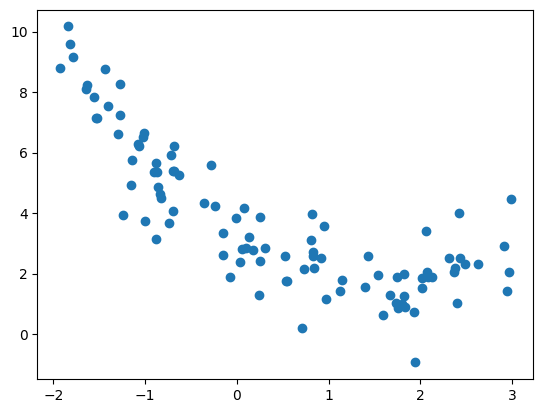

In [131]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

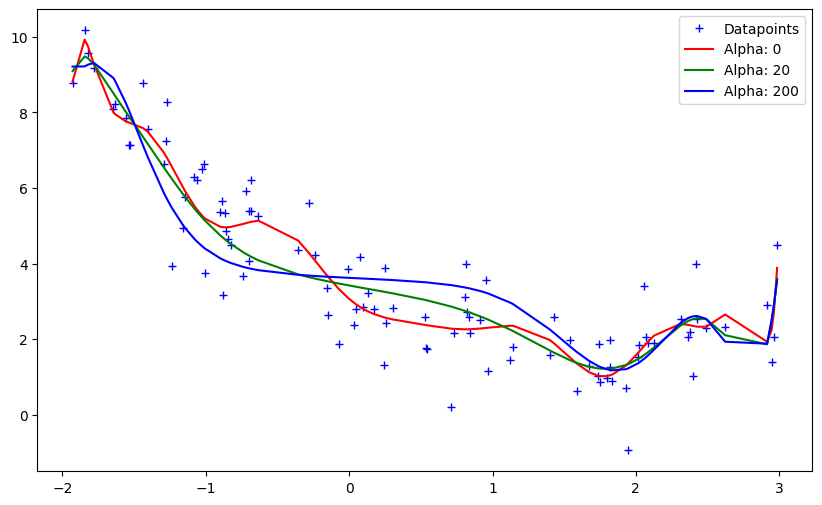

In [132]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()



# 1D

In [133]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [134]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

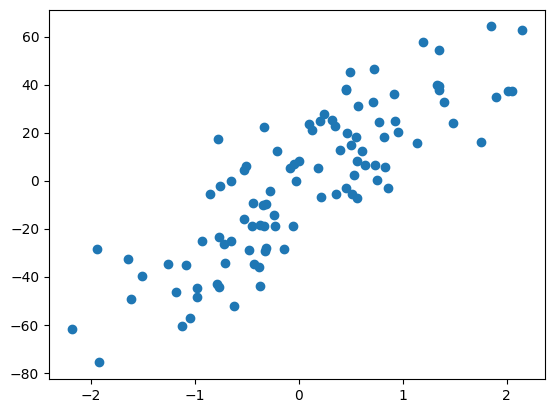

In [135]:
plt.scatter(X,y)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [138]:
from sklearn.linear_model import Ridge

In [139]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [140]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


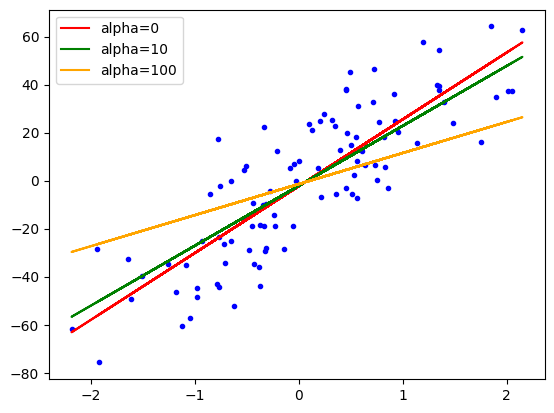

In [141]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [142]:
class Ridge_Regression:

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - self.m * X_train.mean()
        print(self.m)
        print(self.b)

    def predict(X_test):
        pass

In [143]:
reg = Ridge_Regression(alpha=10)

In [144]:
reg.fit(X,y)

[24.9546267]
[-2.126913]


# 2D

In [145]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [146]:
X,y = load_diabetes(return_X_y=True)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [149]:
from sklearn.linear_model import Ridge

In [150]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [151]:
reg.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [152]:
Ridge(alpha=0.1, solver='cholesky')

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [153]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [154]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [155]:
class Ridge_Regression_2D:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


In [156]:
reg = Ridge_Regression_2D()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281


# Gradient Descent

In [157]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [158]:
X,y = load_diabetes(return_X_y=True)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [161]:
from sklearn.linear_model import SGDRegressor

In [162]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [163]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4509269956692148
[  42.34969812 -157.46455246  365.71144727  270.26515298   -5.31529981
  -56.57576985 -168.8634362   139.14333864  328.43146611  100.01922902]
[148.86417013]


In [164]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [165]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.46250101619914563
[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466


In [166]:
class Ridge_Regression_GD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_



In [167]:
reg = Ridge_Regression_GD(epochs=500,alpha=0.001,learning_rate=0.005)

In [168]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260913
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713472
